In [15]:
#Importing necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [16]:
#Load Dataset
dataset = pd.read_csv('./mtcars.csv')
dataset.head()

model   mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  \
0          Mazda RX4  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4   
1      Mazda RX4 Wag  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4   
2         Datsun 710  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4   
3     Hornet 4 Drive  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3   
4  Hornet Sportabout  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3   

   carb  
0     4  
1     4  
2     1  
3     1  
4     2

In [17]:
#Remove Model Column
dataset2 = dataset.drop('model', axis = 1)
dataset2.head()

mpg  cyl   disp   hp  drat     wt   qsec  vs  am  gear  carb
0  21.0    6  160.0  110  3.90  2.620  16.46   0   1     4     4
1  21.0    6  160.0  110  3.90  2.875  17.02   0   1     4     4
2  22.8    4  108.0   93  3.85  2.320  18.61   1   1     4     1
3  21.4    6  258.0  110  3.08  3.215  19.44   1   0     3     1
4  18.7    8  360.0  175  3.15  3.440  17.02   0   0     3     2

In [18]:
#Overview of Dataset Characsteristics
dataset2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 11 columns):
mpg     32 non-null float64
cyl     32 non-null int64
disp    32 non-null float64
hp      32 non-null int64
drat    32 non-null float64
wt      32 non-null float64
qsec    32 non-null float64
vs      32 non-null int64
am      32 non-null int64
gear    32 non-null int64
carb    32 non-null int64
dtypes: float64(5), int64(6)
memory usage: 2.8 KB


In [19]:
#Summary of N/A Values
dataset2.isnull().sum()

mpg     0
cyl     0
disp    0
hp      0
drat    0
wt      0
qsec    0
vs      0
am      0
gear    0
carb    0
dtype: int64

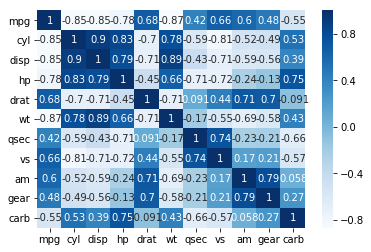

In [20]:
#Visualization of Correlations
sns.heatmap(dataset2.corr(), annot=True, cmap="Blues")

In [21]:
#Identify Correlated Columns
def correlation(dataset,threshold):
    col_corr = set() #Set will contain unique values
    corr_matrix = dataset.corr() #Finding correlation between columns
    for i in range(len(corr_matrix.columns)): #Number of columns
        for j in range (i):
            if abs(corr_matrix.iloc[i,j]) > threshold: #Correlation between columns
                colName = corr_matrix.columns[i] #Getting the column name
                col_corr.add(colName) #Correlated column name higher threshold value
        return col_corr #Returning set of column names
col = correlation (dataset2.drop('mpg', axis = 1), 0.8)
print ('Correlated Columns:', col)

Correlated Columns: set()


In [22]:
#Create X and y Variables
X = dataset2.drop('mpg', axis = 1).values
y = dataset2['mpg'].values

In [23]:
#Training Set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = 100)

In [25]:
#Scale the Data
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.fit_transform(X_test)

In [30]:
#Finding Optimal K Value
from sklearn import neighbors
from sklearn.metrics import mean_squared_error

rmse_val = [] #To store MSE values for different K

for K in range (10):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    
    model.fit(X_train, y_train) #Fit the model
    pred = model.predict(X_test) #Make Prediction on Test Set
    error = np.sqrt(mean_squared_error(y_test,pred)) #Calculate RMSE
    rmse_val.append(error) #Store RMSE values
    print('RMSE value for k =', K, 'is:', error) #Print K with associated RMSE

RMSE value for k = 1 is: 2.4715524328994976
RMSE value for k = 2 is: 2.2921449717303157
RMSE value for k = 3 is: 2.280942439584659
RMSE value for k = 4 is: 1.9829181238049858
RMSE value for k = 5 is: 1.8862661530123481
RMSE value for k = 6 is: 2.0898849364544083
RMSE value for k = 7 is: 2.2452151909436915
RMSE value for k = 8 is: 2.2168842759280736
RMSE value for k = 9 is: 2.2998964780015223
RMSE value for k = 10 is: 2.4922852393507666


In [32]:
#Model Creation
#kNN Regressor Model using lowest RMSE (K=5)
knnreg = neighbors.KNeighborsRegressor(5)
knnreg.fit(X_train, y_train.ravel())

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
          metric_params=None, n_jobs=1, n_neighbors=5, p=2,
          weights='uniform')

In [33]:
#Prediction
y_pred = knnreg.predict(X_test)

In [36]:
#Accuracy Score Using R2
from sklearn.metrics import r2_score
print ("R2: %0.2f" % r2_score(y_test, y_pred))

R2: 0.86


In [38]:
#Review of MAE, MSE, and RMSE
#Calculate MAE, MSE, and RMSE
from sklearn import metrics
print ('Mean Absolute Error: %0.2f' % metrics.mean_absolute_error(y_test, y_pred))
print ('Mean Squared Error: %0.2f' % metrics.mean_squared_error(y_test, y_pred))
print ('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 1.57
Mean Squared Error: 3.56
Root Mean Squared Error: 1.89


In [39]:
#Optimization using GridSearchCV
#Optimize kNN Model using GridSearchCV
from sklearn.model_selection import GridSearchCV
knnreg2 = neighbors.KNeighborsRegressor()
k_range = range(1,10)
param_grid = {
    'n_neighbors': k_range,
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'weights': ['uniform', 'distance']}
knn_model = GridSearchCV(knnreg2, param_grid, cv = 10, verbose = 0, n_jobs=-1, scoring = 'neg_mean_squared_error')

In [41]:
#Create Best Model
best_model = knn_model.fit(X_train, y_train)
print(best_model.best_params_)

{'algorithm': 'brute', 'n_neighbors': 1, 'weights': 'distance'}


In [42]:
#Create Prediction for Optimized Model
y_pred2 = best_model.predict(X_test)

In [43]:
#Accuracy Score Using R2
from sklearn.metrics import r2_score
print ("R2: %0.2f" % r2_score(y_test, y_pred2))

R2: 0.77


In [44]:
#Review of MAE, MSE, and RMSE
#Calculate MAE, MSE, and RMSE
from sklearn import metrics
print ('Mean Absolute Error: %0.2f' % metrics.mean_absolute_error(y_test, y_pred2))
print ('Mean Squared Error: %0.2f' % metrics.mean_squared_error(y_test, y_pred2))
print ('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred2)))

Mean Absolute Error: 2.14
Mean Squared Error: 6.11
Root Mean Squared Error: 2.47


In [45]:
#SGD Classifier with Parameter Tuning
from sklearn.linear_model import SGDRegressor

model = SGDRegressor (max_iter = 1000, random_state = 100)

In [51]:
#Parameters
params = {'loss': ["squared_loss", "huber", "epsilon_insensitive","squared_epsilon_insensitive"],
         'penalty': ["none","l2", "l1", "elasticnet"],
         'alpha': [0.001, 0.0001, 0.00001]}

In [52]:
#Carrying out Grid Search
clf = GridSearchCV(model, params)
clfbestmodel = clf.fit(X_train, y_train)

In [53]:
#The Selected Parameters by Grid Search
print (clfbestmodel.best_params_)

{'alpha': 0.001, 'loss': 'squared_loss', 'penalty': 'l2'}


In [54]:
#Create Prediction for Optimized Model
y_pred3 = clfbestmodel.predict(X_test)

In [55]:
#Accuracy Score using R2
from sklearn.metrics import r2_score
print("R2: %0.2f" % r2_score(y_test,y_pred3))

R2: 0.68


In [56]:
#Review of MAE, MSE, and RMSE
#Calculate MAE, MSE, and RMSE
from sklearn import metrics
print ('Mean Absolute Error: %0.2f' % metrics.mean_absolute_error(y_test, y_pred3))
print ('Mean Squared Error: %0.2f' % metrics.mean_squared_error(y_test, y_pred3))
print ('Root Mean Squared Error: %0.2f' % np.sqrt(metrics.mean_squared_error(y_test, y_pred3)))

Mean Absolute Error: 2.36
Mean Squared Error: 8.42
Root Mean Squared Error: 2.90
